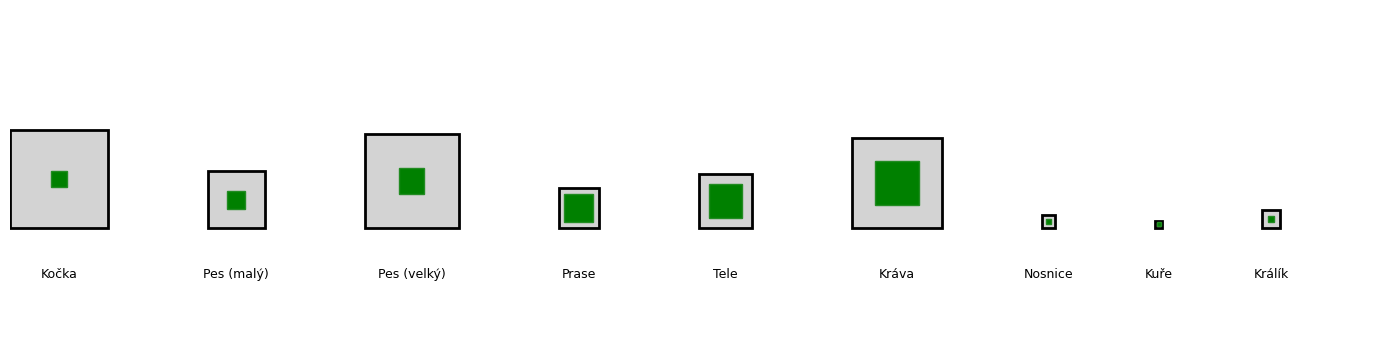

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Měřítko: 1 m² = 100x100 px
scale = 100

# Seznam zvířat: (jméno, velikost prostoru v m², odhadovaná plocha těla v m²)
animals = [
    ("Kočka", 6, 0.15),
    ("Pes (malý)", 2, 0.2),
    ("Pes (velký)", 5.5, 0.4),
    ("Prase", 1, 0.5),
    ("Tele", 1.8, 0.7),
    ("Kráva", 5, 1.2),
    ("Nosnice", 0.11, 0.015),
    ("Kuře", 0.03, 0.01),
    ("Králík", 0.2, 0.025),
]

fig, ax = plt.subplots(figsize=(14, 7))
x_offset = 0

for name, space_area, body_area in animals:
    side_space = (space_area * scale) ** 0.5
    side_body = (body_area * scale) ** 0.5

    # Vnější čtverec - prostor
    rect_space = patches.Rectangle((x_offset, 0), side_space, side_space,
                                   linewidth=2, edgecolor='black', facecolor='lightgrey')
    ax.add_patch(rect_space)

    # Vnitřní čtverec - tělo zvířete
    center_x = x_offset + side_space / 2
    center_y = side_space / 2
    rect_body = patches.Rectangle((center_x - side_body / 2, center_y - side_body / 2),
                                  side_body, side_body,
                                  linewidth=1, edgecolor='forestgreen', facecolor='green')
    ax.add_patch(rect_body)

    # Popisek zvířete pod čtverec
    ax.text(center_x, -10, name, ha='center', va='top', fontsize=9)

    x_offset += side_space + 25

# Nastavení osy
ax.set_xlim(0, x_offset)
ax.set_ylim(-30, max((space * scale) ** 0.5 for _, space, _ in animals) + 30)
ax.set_aspect('equal')
ax.axis('off')

plt.tight_layout()
plt.show()
